In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

In [2]:
data = pd.read_csv("walmart.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
missing_values = data.isnull().sum()
missing_values


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

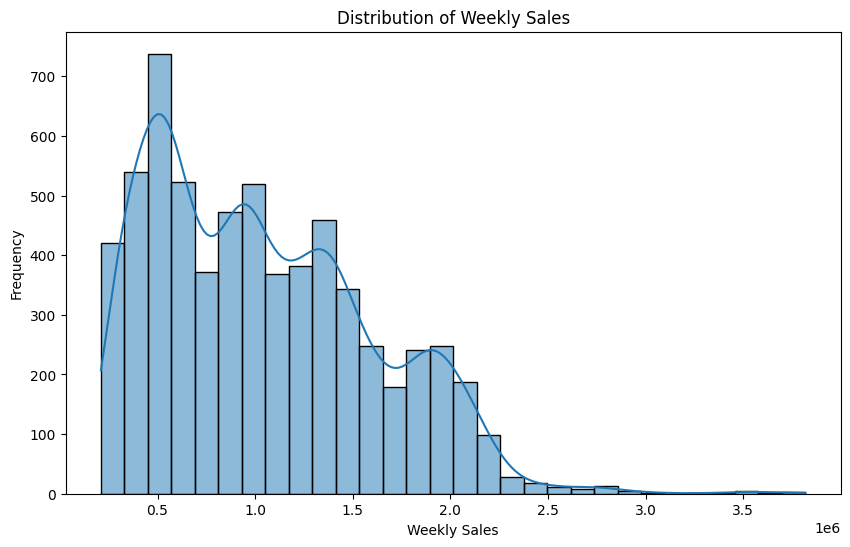

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Weekly_Sales', bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

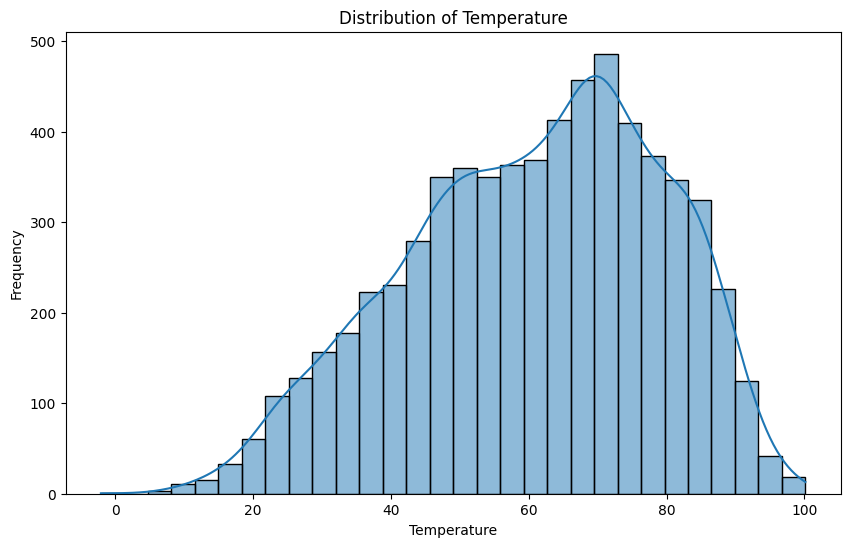

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Temperature', bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


Text(0, 0.5, 'Frequency')

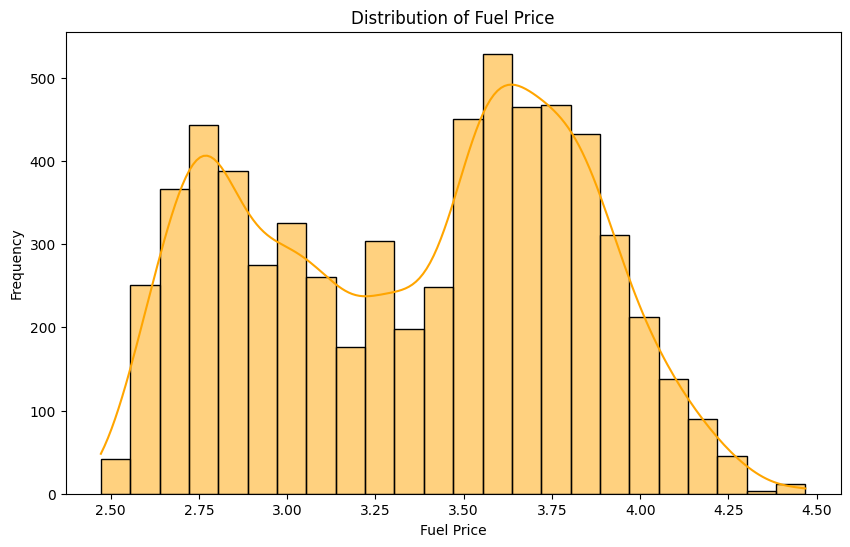

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Fuel_Price'], kde=True, color='orange')
plt.title('Distribution of Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

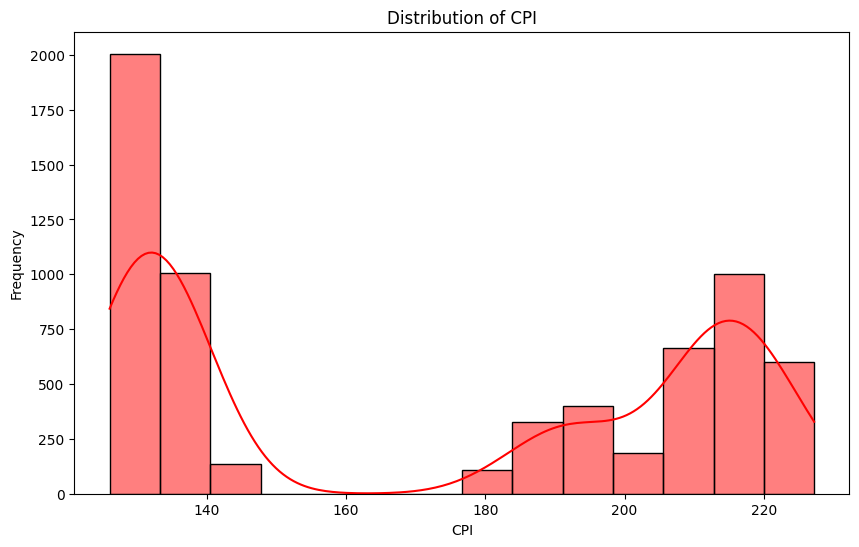

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['CPI'], kde=True, color='red')
plt.title('Distribution of CPI')
plt.xlabel('CPI')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

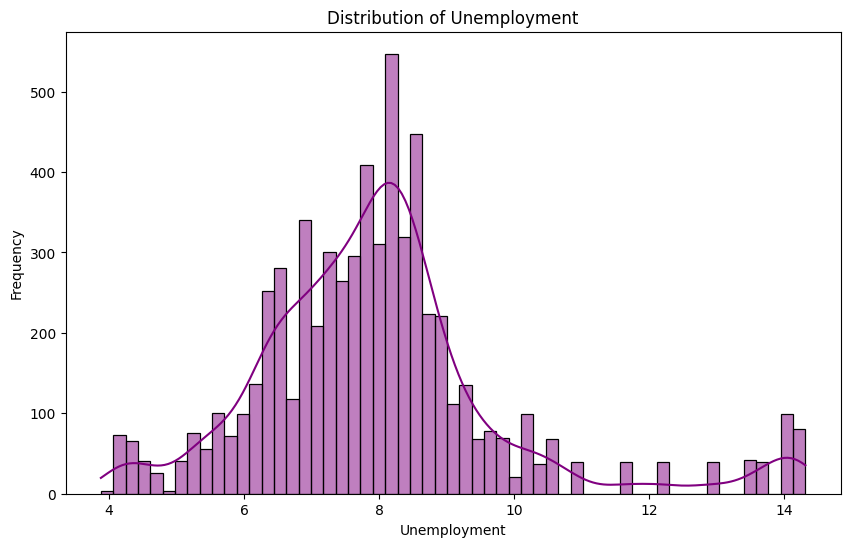

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Unemployment'], kde=True, color='purple')
plt.title('Distribution of Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Frequency')

In [11]:
max_sales_store = data.groupby('Store')['Weekly_Sales'].sum().idxmax()
max_sales_value = data.groupby('Store')['Weekly_Sales'].sum().max()
print("Store with maximum sales:", max_sales_store)
print("Maximum sales value:", max_sales_value)


Store with maximum sales: 20
Maximum sales value: 301397792.46


In [12]:
max_std_store = data.groupby('Store')['Weekly_Sales'].std().idxmax()
max_std_value = data.groupby('Store')['Weekly_Sales'].std().max()
print("Store with maximum standard deviation:", max_std_store)
print("Maximum standard deviation:", max_std_value)


Store with maximum standard deviation: 14
Maximum standard deviation: 317569.9494755081


In [13]:
mean_non_holiday_sales = data[data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
holidays_higher_than_mean = data[data['Holiday_Flag'] == 1].groupby('Date')['Weekly_Sales'].sum() > mean_non_holiday_sales
holidays_with_higher_sales = holidays_higher_than_mean[holidays_higher_than_mean].index.tolist()
print("Holidays with higher sales than mean in non-holiday season:", holidays_with_higher_sales)


Holidays with higher sales than mean in non-holiday season: [Timestamp('2010-02-12 00:00:00'), Timestamp('2010-09-10 00:00:00'), Timestamp('2010-11-26 00:00:00'), Timestamp('2010-12-31 00:00:00'), Timestamp('2011-02-11 00:00:00'), Timestamp('2011-09-09 00:00:00'), Timestamp('2011-11-25 00:00:00'), Timestamp('2011-12-30 00:00:00'), Timestamp('2012-02-10 00:00:00'), Timestamp('2012-09-07 00:00:00')]


In [14]:
# Extract month and year from Date column

data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month

# Monthly view
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].sum()
# print("Monthly sales:\n", monthly_sales)

# Semester view
semester_sales = data.groupby(['Year', pd.cut(data['Month'], bins=[1, 6, 12], labels=['Semester 1', 'Semester 2'])])['Weekly_Sales'].sum()
# print("\nSemester sales:\n", semester_sales)

# Assuming 'monthly_sales' and 'semester_sales' are your pandas Series containing the sales data

# Format numbers with commas for thousands separators
monthly_sales_formatted = monthly_sales.map('{:,.0f}'.format)
semester_sales_formatted = semester_sales.map('{:,.0f}'.format)

# Print the formatted data

print("\nSemester Sales:")
semester_sales_formatted


# monthly_sales_df = monthly_sales.reset_index()
# semester_sales_df = semester_sales.reset_index()

# # Display monthly sales in tabular format
# print("Monthly Sales:")
# print(monthly_sales_df)

# # Display semester sales in tabular format
# print("\nSemester Sales:")
# print(semester_sales_df)


Semester Sales:


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10564\861411904.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  semester_sales = data.groupby(['Year', pd.cut(data['Month'], bins=[1, 6, 12], labels=['Semester 1', 'Semester 2'])])['Weekly_Sales'].sum()


Year  Month     
2010  Semester 1      982,622,260
      Semester 2    1,306,263,860
2011  Semester 1      963,635,830
      Semester 2    1,320,860,210
2012  Semester 1    1,041,870,945
      Semester 2      789,367,443
Name: Weekly_Sales, dtype: object

In [15]:
print("Monthly Sales:")
monthly_sales_formatted

Monthly Sales:


Year  Month
2010  2        190,332,983
      3        181,919,802
      4        231,412,368
      5        186,710,934
      6        192,246,172
      7        232,580,126
      8        187,640,111
      9        177,267,896
      10       217,161,824
      11       202,853,370
      12       288,760,533
2011  1        163,703,967
      2        186,331,328
      3        179,356,448
      4        226,526,511
      5        181,648,158
      6        189,773,385
      7        229,911,399
      8        188,599,332
      9        220,847,738
      10       183,261,283
      11       210,162,355
      12       288,078,102
2012  1        168,894,472
      2        192,063,580
      3        231,509,650
      4        188,920,906
      5        188,766,479
      6        240,610,329
      7        187,509,452
      8        236,850,766
      9        180,645,544
      10       184,361,680
Name: Weekly_Sales, dtype: object

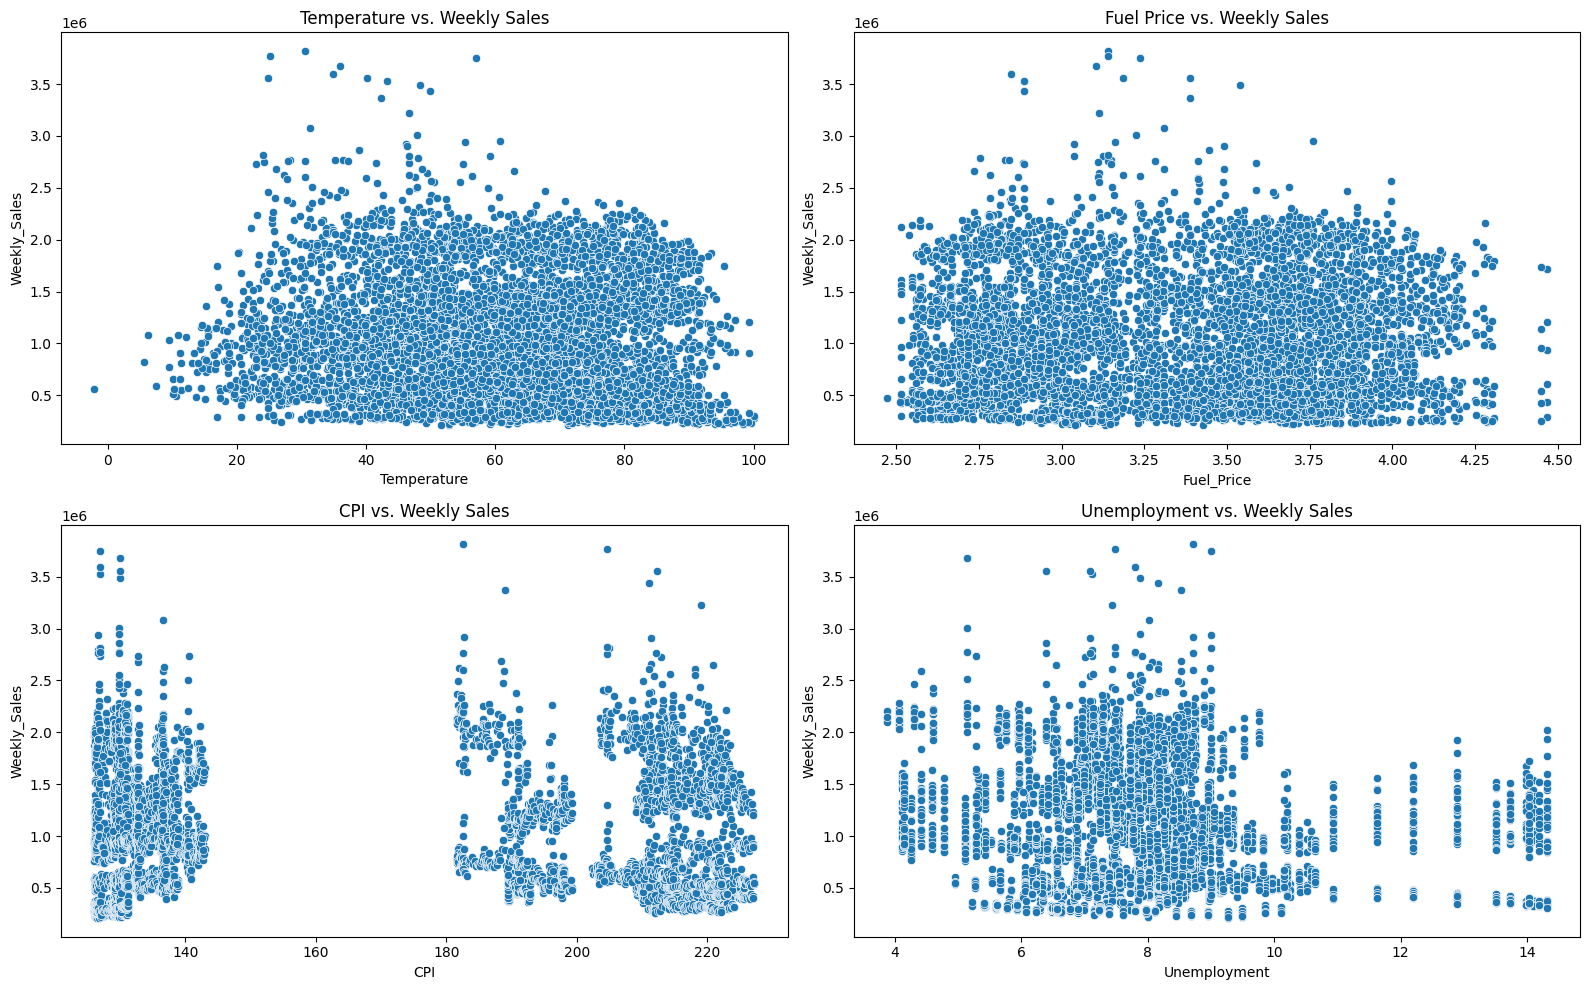

In [16]:
# Visualize relations between Weekly_Sales and other numeric features
plt.figure(figsize=(16, 10))

# Temperature vs. Weekly_Sales
plt.subplot(2, 2, 1)
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Temperature vs. Weekly Sales')

# Fuel_Price vs. Weekly_Sales
plt.subplot(2, 2, 2)
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=data)
plt.title('Fuel Price vs. Weekly Sales')

# CPI vs. Weekly_Sales
plt.subplot(2, 2, 3)
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data)
plt.title('CPI vs. Weekly Sales')

# Unemployment vs. Weekly_Sales
plt.subplot(2, 2, 4)
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=data)
plt.title('Unemployment vs. Weekly Sales')

plt.tight_layout()
plt.show()
